In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

### Function to clean

In [ ]:
def cleaner(data, lower, upper, roll):
    new_data = roll_data(small_noise(norm_data(cut_data(data)), lower, upper), roll)
    
    return new_data

### Defining a function to get only the interesting data:

In [1]:
def cut_data(data):
    new_data = data[~data.isna()][2:].astype('int64')
    return new_data

# test = cut_data(data['R.9'])
# test.max()

### Defining a function to set the mean to 0

In [2]:
def norm_data(data):
    data_mean = int(data.mean())
    new_data = []
    for i in range(len(data)):
        new_point = data.iloc[i] - data_mean
        new_data.append(new_point)
    return new_data
    
# data_norm = norm(data_str)
# max(data_norm)

### Defining a function to remove small noise

In [3]:
def small_noise(data, lower, upper):
    new_data = [x if (x>upper or x<lower) else 0 for x in data]
    return pd.DataFrame(new_data)

# data_non_noise = small_noise(data_norm, -10, 20)
# data_non_noise.max()

### Defining a function to smooth the points by rolling the mean

In [5]:
def roll_data(data, roller):
    new_data = data.rolling(window = roller).sum()
    return pd.DataFrame(new_data)

# roll = 2
# data_rolled = rolling(data_non_noise, roll)
# data_rolled

In [8]:
def graphing(data_raw, lower, upper, roll):
    number_of_graphs = int(input('How many graphs do you wish to see? '))
    fig, ax = plt.subplots(number_of_graphs, 2, figsize= (10,number_of_graphs*4),gridspec_kw={'width_ratios': [2, 1]})

    for i in range(number_of_graphs):
        viewing = cut_data(data.iloc[:,i+80])
        test = rolling(small_noise(norm(viewing), lower, upper), roll)
        
        test_max = viewing[viewing == viewing.max()].index[0]
        
        ax[i,0].plot(viewing, color='orange')
        ax[i,1].plot(test)
        ax[i,1].set_xlim(test_max - 20, test_max + 50)
    

(1884, 1954)

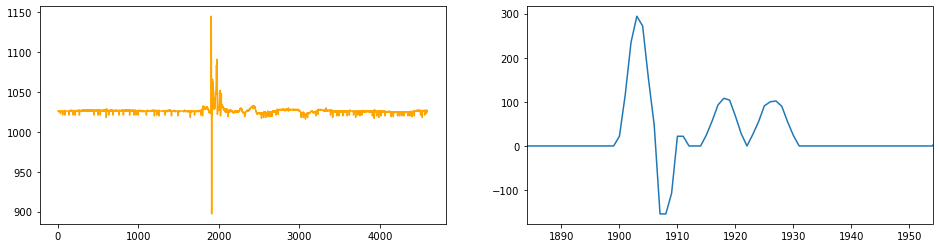

In [313]:
fig, ax = plt.subplots(1, 2, figsize= (16, 4))
lower, upper = -10, 20
smooth = 3

viewing = cut_data(data.iloc[:,55])
test_max = viewing[viewing == viewing.max()].index[0]

test = rolling(small_noise(norm(viewing), lower, upper), smooth)
ax[0].plot(viewing, color='orange')
ax[1].plot(test)
ax[1].set_xlim(test_max - 20, test_max + 50)

### Function to find the top peak of the data

In [309]:
def peak(data):
    new_data = []
    for i in range(len(data)-1):
        new_data.append(data.iloc[i+1]-data.iloc[i])
    return pd.DataFrame(new_data)

test_peak = peak(test)
test_peak.iloc[:,0].unique()

array([ nan,   0.,  35., -35.,  30.,  38.,  37.,   9.,  12.,  28.,  11.,
         4.,  -2.,  -6., -69., -67., -55., -21., -20.,  21.,  20., -12.,
       -15., -18.,  -7.,   5.,  19.,  15.,  13., -19., -11.])

0
0    125.0
dtype: float64


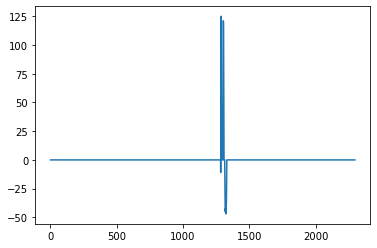

In [337]:
lower, upper = -10, 20
smooth = 3

clean_data = pd.DataFrame()

# for i in range(number_of_graphs):
# viewing = cut_data(data.iloc[:,55])
# test_max = viewing[viewing == viewing.max()].index[0]
test = rolling(small_noise(norm(cut_data(data.iloc[:,1])), lower, upper), smooth)

pos_max = test[test == test.max()].index[0]

temp_list = test.iloc[pos_max - 20: pos_max + 50]
print(pos_max)
print(test.max())
len(temp_list)

# plt.plot(test)